In [28]:
%run arctangent.ipynb
%run logarithm.ipynb
random.seed(9338)
sa = SimAnneal_log(coords,eta_0 = 25,alpha = 50,delta= 0 ,rho = 10,M = 200, stopping_iter=20000)
# simulated annealing
sa.anneal()
sa.worse_acceptances

280

In [30]:
%run arctangent.ipynb
%run logarithm.ipynb
import matplotlib.pyplot as plt
import random
import numpy as np
import time



def read_coords(path):
    coords = []
    with open(path, "r") as f:
        for line in f.readlines():
            line = [float(x.replace("\n", "")) for x in line.split(" ")]
            coords.append(line)
    return coords


def generate_random_coords(num_nodes):
    return [[random.uniform(0, 100), random.uniform(0, 100)] for i in range(num_nodes)]


if __name__ == "__main__":
    output1 = []
    output2 = []
    output3 = []
    acceptances_sa = []
    acceptances_arc = []
    acceptances_log = []
    small_acceptances_sa = []
    small_acceptances_arc = []
    small_acceptances_log = []
    worse_acceptances_sa = []
    worse_acceptances_arc = []
    worse_acceptances_log = []
    random.seed(15)
    seed = []
    arc_best_seed = 1
    arc_worst_seed = 1
    arc_best_improvement = -1
    arc_worst_improvement = 1
    log_best_seed = 1
    log_worst_seed = 1
    log_best_improvement = -1
    log_worst_improvement = 1
    for i in range(100):
        seed.append(random.randint(0,10200))

    for i in range(100):
        random.seed(seed[i])
        #coords = read_coords("coord.txt")  # generate_random_coords(100)
        coords = generate_random_coords(50)
        random.seed(200)
        sa = SimAnneal_log(coords,eta_0 = 25,alpha = 50,delta= 0 ,rho = 10,M = 200, stopping_iter=20000)
        # simulated annealing
        sa.anneal()
        acceptances_sa.append((sa.acceptances / 20000)*100)
        small_acceptances_sa.append((sa.small_acceptances / 20000)*100)
        worse_acceptances_sa.append((sa.worse_acceptances / 20000)*100)
        #sa.visualize_routes()
        #sa.plot_learning()
        
        # arctan_IET
        random.seed(200)
        iet_arc = SimAnneal_arc(coords,eta_0 = 25,alpha = 50,delta= 0 ,rho = 10,M = 200, stopping_iter=20000)
        iet_arc.arctan_anneal()
        acceptances_arc.append((iet_arc.acceptances / 20000)*100)
        small_acceptances_arc.append((iet_arc.small_acceptances / 20000)*100)
        worse_acceptances_arc.append((iet_arc.worse_acceptances / 20000)*100)
        improve_percentage1 = (sa.best_fitness - iet_arc.best_fitness)/sa.best_fitness
        output1.append(improve_percentage1)
        if improve_percentage1 >  arc_best_improvement:
            arc_best_improvement = improve_percentage1
            arc_best_seed = seed[i]
        if improve_percentage1 <  arc_worst_improvement:
            arc_worst_improvement = improve_percentage1
            arc_worst_seed = seed[i]
        
        #log_IET
        random.seed(200)
        iet_log = SimAnneal_log(coords,eta_0 = 50,alpha = 100,delta= 0 ,rho = 1,M = 100, stopping_iter = 20000)
        iet_log.log_anneal()
        acceptances_log.append((iet_log.acceptances / 20000)*100)
        small_acceptances_log.append((iet_log.small_acceptances / 20000)*100)
        worse_acceptances_log.append((iet_log.worse_acceptances / 20000)*100)
        improve_percentage2 = (sa.best_fitness - iet_log.best_fitness)/sa.best_fitness
        output2.append(improve_percentage2)
        if improve_percentage2 >  log_best_improvement:
            log_best_improvement = improve_percentage2
            log_best_seed = seed[i]
        if improve_percentage2 <  log_worst_improvement:
            log_worst_improvement = improve_percentage2
            log_worst_seed = seed[i]
        
        # log vs arc
        improve_percentage3 = (iet_log.best_fitness - iet_arc.best_fitness)/sa.best_fitness
        output3.append(improve_percentage3)
        



print(np.mean(np.array(acceptances_sa)))
print(np.mean(np.array(acceptances_arc)))
print(np.mean(np.array(acceptances_log)))
print(np.mean(np.array(small_acceptances_sa)))
print(np.mean(np.array(small_acceptances_arc)))
print(np.mean(np.array(small_acceptances_log)))
print(np.mean(np.array(worse_acceptances_sa)))
print(np.mean(np.array(worse_acceptances_arc)))
print(np.mean(np.array(worse_acceptances_log)))

2.4098
0.20409999999999998
0.14854999999999996
2.3783000000000003
0.1334
0.0998
1.4642000000000002
0.0082
0.00425


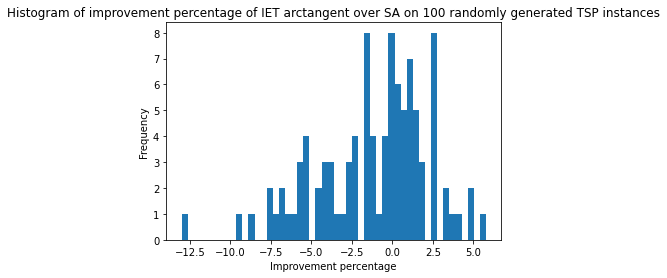

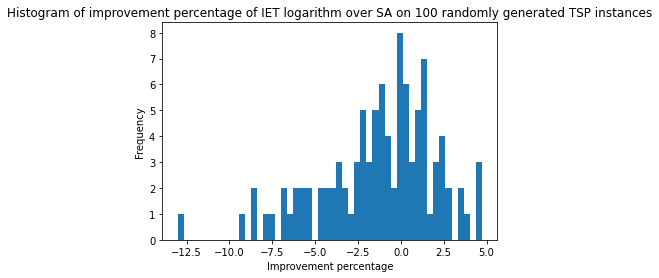

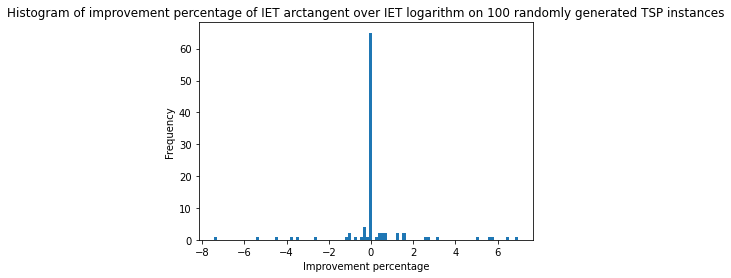

In [5]:
plt.hist(np.array(output1) * 100, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Improvement percentage")
plt.title("Histogram of improvement percentage of IET arctangent over SA on 100 randomly generated TSP instances")
plt.show()
    
plt.hist(np.array(output2) * 100, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Improvement percentage")
plt.title("Histogram of improvement percentage of IET logarithm over SA on 100 randomly generated TSP instances")
plt.show()
    
plt.hist(np.array(output3) * 100, bins=100)
plt.ylabel("Frequency")
plt.xlabel("Improvement percentage")
plt.title("Histogram of improvement percentage of IET arctangent over IET logarithm on 100 randomly generated TSP instances")
plt.show()

In [18]:
print(arc_best_seed )
print(arc_worst_seed )
print(arc_best_improvement)
print(arc_worst_improvement)
print(log_best_seed) 
print(log_worst_seed)
print(log_best_improvement) 
print(log_worst_improvement)

9332
6338
0.05779509254482339
-0.13025373046999847
3745
6338
0.047335475434519596
-0.13025373046999847


In [79]:
print(np.mean(output))
print(np.amax(output))
print(np.amin(output))
print(np.median(output))
print(np.sum(np_output >= 0))
print(np.sum(np_output < 0))

-0.004746409091785973
0.05372794755992653
-0.04907736460662465
-0.0044540823504858685
10
10


In [23]:
random.seed(arc_best_seed)
#coords = read_coords("coord.txt")  # generate_random_coords(100)
coords = generate_random_coords(50)


sa = SimAnneal_log(coords,eta_0 = 25,alpha = 50,delta= 0 ,rho = 10,M = 200, stopping_iter=20000)
# simulated annealing
sa.anneal()
#sa.visualize_routes()
#sa.plot_learning()

# arctan_IET

iet_arc = SimAnneal_arc(coords,eta_0 = 25,alpha = 50,delta= 0 ,rho = 10,M = 200, stopping_iter=20000)
iet_arc.arctan_anneal()
improve_percentage1 = (sa.best_fitness - iet_arc.best_fitness)/sa.best_fitness
improve_percentage1
        

0.05779509254482339

In [21]:
random.seed(log_best_seed)
#coords = read_coords("coord.txt")  # generate_random_coords(100)
coords = generate_random_coords(50)

random.seed(200)
sa = SimAnneal_log(coords,eta_0 = 25,alpha = 50,delta= 0 ,rho = 10,M = 200, stopping_iter=20000)
# simulated annealing
sa.anneal()
#sa.visualize_routes()
#sa.plot_learning()

#log_IET
random.seed(200)
iet_log = SimAnneal_log(coords,eta_0 = 50,alpha = 100,delta= 0 ,rho = 1,M = 100, stopping_iter = 20000)
iet_log.log_anneal()
improve_percentage2 = (sa.best_fitness - iet_log.best_fitness)/sa.best_fitness
improve_percentage2
        


0.047335475434519596

In [84]:
def tuple_generator(l1,l2,l3,l4):
    all_tuples = []
    for i in range(len(l1)):
        for j in range(len(l2)):
            for k in range(len(l3)):
                for l in range(len(l4)):
                    all_tuples.append((l1[i],l2[j],l3[k],l4[l]))
    return all_tuples
        

In [85]:
# making a big test to sweep and check for best parameters - eta_0, alpha, delta, rho 
eta_0s = [1,5,10,15,25,50]
alphas = [0,5,10,25,50,100,200,300,500]
delta = [0,2,8]
rhos = [0.001,0.1,1,1.1,1.5,3,5,7.5,15,40,80]
parameters = tuple_generator(eta_0s,alphas,delta,rhos)
# first tuple position is eta_0, second is alpha, third is delta and 4th is rho.
best_parameters = parameters[i]
best_param_output = [-50]*20
for theta in parameters:
    output = []
    random.seed(15)
    seed = []
    for i in range(50):
        seed.append(random.randint(0,10200))
    for i in range(50):
        random.seed(seed[i])
        coords = generate_random_coords(50)
        random.seed(200)
        sa = SimAnneal(coords,eta_0 = theta[0],alpha = theta[1],delta= theta[2] ,rho = theta[3],M = 100, stopping_iter=10000)
        # simulated annealing
        sa.anneal()
        # improved annealing
        random.seed(200)
        iet = SimAnneal(coords,eta_0 = theta[0],alpha = theta[1],delta= theta[2] ,rho = theta[3],M = 200, stopping_iter=10000)
        iet.IET_anneal()
        improve_percentage = (sa.best_fitness - iet.best_fitness)/sa.best_fitness
        output.append(improve_percentage)

    np_output = np.array(output)
    if np.mean(output) > np.mean(best_param_output):
        best_param_output = output
        best_parameters = theta
    if np.mean(output) < np.mean(worst_param_output):
        worst_param_output = output
        worst_parameters = theta
best_parameters
worst_parameters




(0, 0, 0, 0.001)

In [ ]:
 print('arctan results')
    np_output1 = np.array(output1)
    print(np.mean(output1))
    print(np.amax(output1))
    print(np.amin(output1))
    print(np.median(output1))
    print(np.sum(np_output1 >= 0))
    print(np.sum(np_output1 < 0))

    
    print('log results')
    np_output2 = np.array(output2)
    print(np.mean(output2))
    print(np.amax(output2))
    print(np.amin(output2))
    print(np.median(output2))
    print(np.sum(np_output2 >= 0))
    print(np.sum(np_output2 < 0))
    
    print('arc vs log')
    np_output3 = np.array(output3)
    print(np.mean(output3))
    print(np.amax(output3))
    print(np.amin(output3))
    print(np.median(output3))
    print(np.sum(np_output3 >= 0))
    print(np.sum(np_output3 < 0))

    
    

    plt.hist(np.array(output1) * 100, bins=50)
    plt.ylabel("Frequency")
    plt.xlabel("Improvement percentage")
    plt.title("Histogram of improvement percentage of IET arctangent over SA on 100 randomly generated TSP instances")
    plt.show()
    
    plt.hist(np.array(output2) * 100, bins=50)
    plt.ylabel("Frequency")
    plt.xlabel("Improvement percentage")
    plt.title("Histogram of improvement percentage of IET logarithm over SA on 100 randomly generated TSP instances")
    plt.show()
    
    plt.hist(np.array(output3) * 100, bins=50)
    plt.ylabel("Frequency")
    plt.xlabel("Improvement percentage")
    plt.title("Histogram of improvement percentage of IET arctangent over IET logarithm on 100 randomly generated TSP instances")
    plt.show()

UsageError: Line magic function `%` not found.
